In [92]:
import numpy as np
import wave
import matplotlib.pyplot as plt
# import japanize_matplotlib

## 1. データ読み込み

In [93]:
def read_audio(file_name):
    wav = wave.open(file_name, mode="rb")
    return wav.getframerate(), np.frombuffer(wav.readframes(-1), dtype=np.int16)

audio_filename = "L80e060a.wav"
Sr, impulse_response = read_audio(audio_filename)
input_audio = np.random.randn(int(Sr*1)) # 標準正規分布からサンプリング

In [105]:
Sr

44100

## 2. インパルス応答表示

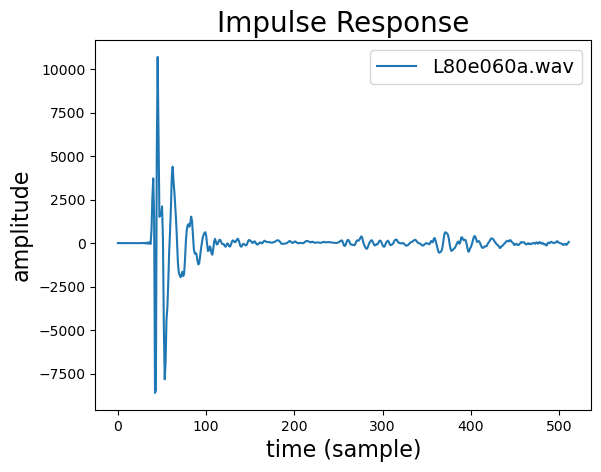

In [120]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.arange(len(impulse_response)), impulse_response, label="L80e060a.wav")


ax.set_xlabel("time (sample)", fontsize=16)
ax.set_ylabel("amplitude", fontsize=16)

ax.set_title("Impulse Response", fontsize=20)

ax.legend(fontsize=14)

plt.show()

## 3. 入力音声表示

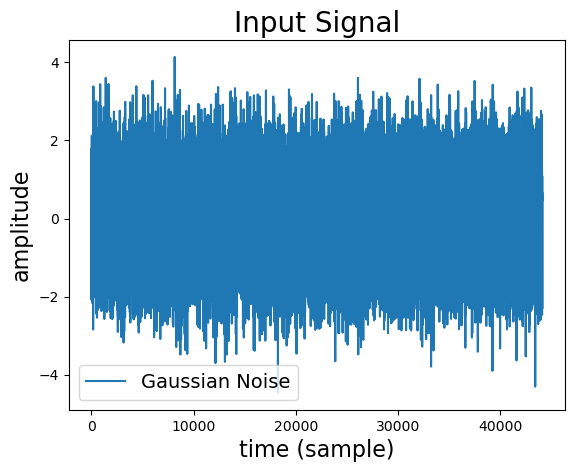

In [119]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.arange(len(input_audio)), input_audio, label="Gaussian Noise")

ax.set_xlabel("time (sample)", fontsize=16)
ax.set_ylabel("amplitude", fontsize=16)

ax.set_title("Input Signal", fontsize=20)

ax.legend(fontsize=14)

plt.show()

## 4. conv

In [114]:
### convolution
result = []

for t in range(input_audio.shape[0]):
    conv = 0
    for k in range(impulse_response.shape[0]):
        conv += impulse_response[k]*input_audio[t-k]
    result.append(conv)

d = np.array(result)


In [115]:
conv_input = d

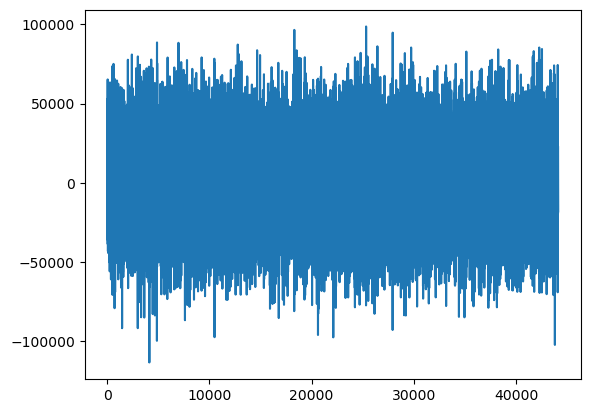

In [116]:
plt.plot(d)

## 5. LMS1

In [99]:
### LSR1

u = np.zeros(len(impulse_response)) # init
w = np.zeros(len(impulse_response)) # init
e = np.zeros(len(input_audio)) # init

mu = 1e-3*1.1



for t in range(len(d)):
    u = np.r_[input_audio[t],u[:-1]]
    e[t] = d[t] - np.dot(w.T,u)
    w = w + 2*mu*e[t]*u

LSR1_error_db = 10*np.log10(e**2)


C:\Users\yusuke\AppData\Local\Temp\ipykernel_1852\3598148962.py:18: RuntimeWarning: divide by zero encountered in log10
  LSR1_error_db = 10*np.log10(e**2)


<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
C:\Users\yusuke\AppData\Local\Temp\ipykernel_1852\384494915.py:4: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(np.arange(44100), LSR1_error_db, label="LMS($\mu = 0.0011$)")
C:\Users\yusuke\AppData\Local\Temp\ipykernel_1852\384494915.py:4: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(np.arange(44100), LSR1_error_db, label="LMS($\mu = 0.0011$)")


TypeError: Axes.text() missing 2 required positional arguments: 'y' and 's'

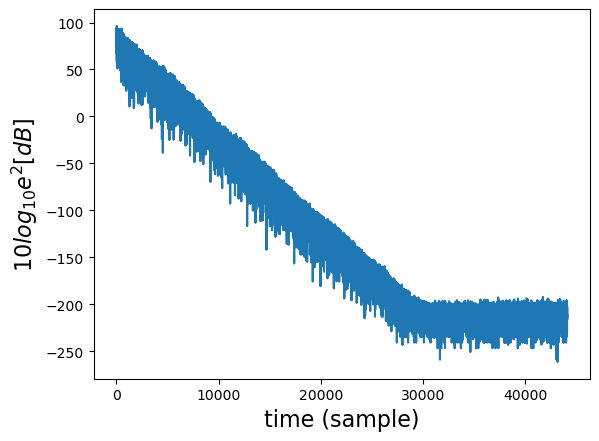

In [133]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.arange(44100), LSR1_error_db, label="LMS($\mu = 0.0011$)")

ax.set_xlabel("time (sample)", fontsize=16)
ax.set_ylabel("$10log_{10}e^2 [dB]$", fontsize=16)

ax.set_title("LMS", fontsize=20)

ax.legend(fontsize=14)
plt.show()

## 6. LMS2

In [101]:
### LSR2

u = np.zeros(len(impulse_response)) # init
w = np.zeros(len(impulse_response)) # init
e = np.zeros(len(input_audio)) # init

# input_audio.append(0)
mu = 1e-3*1.5



for t in range(len(d)):
    u = np.r_[input_audio[t],u[:-1]]
    e[t] = d[t] - np.dot(w.T,u)
    w = w + 2*mu*e[t]*u

LSR2_error_db = 10*np.log10(e**2)


C:\Users\yusuke\AppData\Local\Temp\ipykernel_1852\244031911.py:17: RuntimeWarning: divide by zero encountered in log10
  LSR2_error_db = 10*np.log10(e**2)


<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
C:\Users\yusuke\AppData\Local\Temp\ipykernel_1852\1215788521.py:4: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(np.arange(44100), LSR2_error_db, label="LMS($\mu = 0.0015$)")


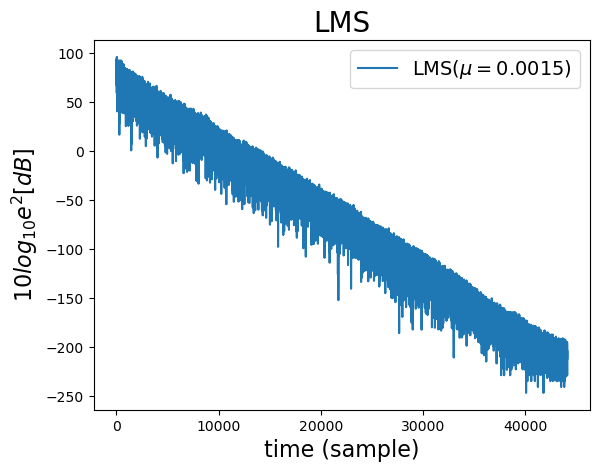

In [122]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.arange(44100), LSR2_error_db, label="LMS($\mu = 0.0015$)")

ax.set_xlabel("time (sample)", fontsize=16)
ax.set_ylabel("$10log_{10}e^2 [dB]$", fontsize=16)

ax.set_title("LMS", fontsize=20)

ax.legend(fontsize=14)
plt.show()

## 7. RLS

In [103]:
### RLS
lam = 1e-1
p = 1e-12*np.eye(len(impulse_response))
w = np.zeros(len(impulse_response))


for t in range(len(d)):
    u = np.r_[input_audio[t],u[:-1]]
    e[t] = d[t] - np.dot(w.T,u)
    g = (np.dot(p,u))/(lam + np.dot(np.dot(u.T, p), u))
    p = (p/lam) - (np.dot(np.dot(g, u.T), p)/lam)
    w = w + g*e[t]

RLS_error_db = 10*np.log10(e**2)

C:\Users\yusuke\AppData\Local\Temp\ipykernel_1852\3129911533.py:14: RuntimeWarning: divide by zero encountered in log10
  RLS_error_db = 10*np.log10(e**2)


<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
C:\Users\yusuke\AppData\Local\Temp\ipykernel_1852\1118539749.py:4: SyntaxWarning: invalid escape sequence '\l'
  ax.plot(np.arange(44100), RLS_error_db, label="RLS($\lambda=0.1, \epsilon=10^{-12}$)")


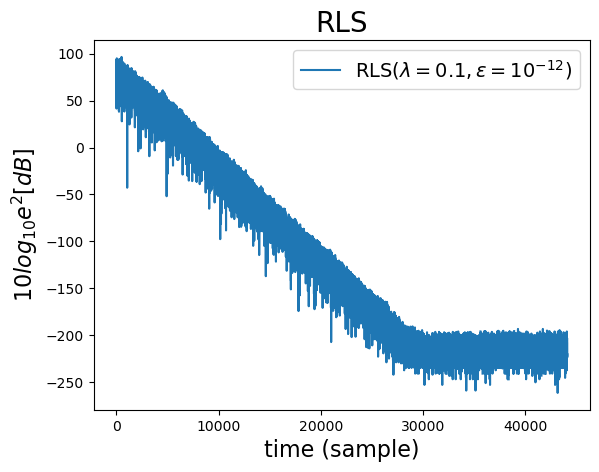

In [123]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.arange(44100), RLS_error_db, label="RLS($\lambda=0.1, \epsilon=10^{-12}$)")

ax.set_xlabel("time (sample)", fontsize=16)
ax.set_ylabel("$10log_{10}e^2 [dB]$", fontsize=16)

ax.set_title("RLS", fontsize=20)

ax.legend(fontsize=14)
plt.show()

# 書き込み

In [125]:
def write_wave(file_name, data, sampwidth=3, fs=48000):
    file = wave.open(file_name, "wb") # open file
    # setting parameters
    file.setnchannels(1)
    file.setsampwidth(sampwidth)
    file.setframerate(fs)
    frames = float2binary(data, sampwidth) # float to binary
    file.writeframes(frames)
    file.close() # close file

def float2binary(data, sampwidth):
    data = (data*(2**(8*sampwidth-1)-1)).reshape(data.size, 1) # Normalize (float to int)
    if sampwidth==1:
        data = data+128
        frames = data.astype(np.uint8).tobytes()
    elif sampwidth==2:
        frames = data.astype(np.int16).tobytes()
    elif sampwidth==3:
        a32 = np.asarray(data, dtype = np.int32)
        a8 = (a32.reshape(a32.shape + (1,)) >> np.array([0, 8, 16])) & 255
        frames = a8.astype(np.uint8).tobytes()
    elif sampwidth==4:
        frames = data.astype(np.int32).tobytes()
    return frames

write_wave(file_name="gaussian_noise.wav", data=input_audio, sampwidth=1, fs=44100)

# spectrogram

In [ ]:
file = "gaussian_noise.wav"

# 自己相関係数

In [149]:
auto_correlate = np.correlate(input_audio, input_audio, mode='full')[len(input_audio)-1:]
auto_correlate

array([ 4.37389068e+04, -2.81623915e+02, -3.43487541e+01, ...,
        4.78923120e+00,  3.05717577e+00, -8.42419925e-01])

In [150]:
auto_correlate

array([ 4.37389068e+04, -2.81623915e+02, -3.43487541e+01, ...,
        4.78923120e+00,  3.05717577e+00, -8.42419925e-01])

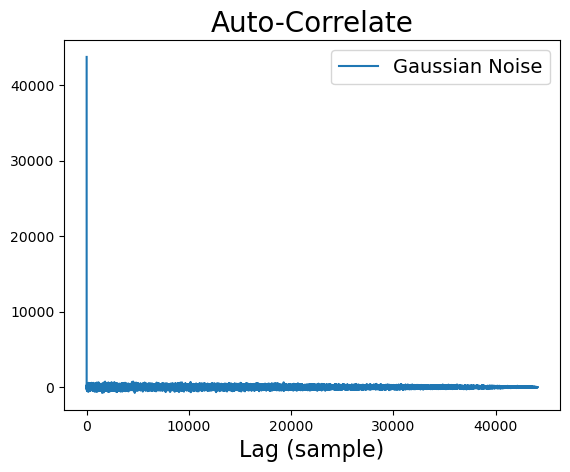

In [154]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.arange(len(auto_correlate)), auto_correlate, label="Gaussian Noise")

ax.set_xlabel("Lag (sample)", fontsize=16)
# ax.set_ylabel("$10log_{10}e^2 [dB]$", fontsize=16)

ax.set_title("Auto-Correlate", fontsize=20)

ax.legend(fontsize=14)
plt.show()